In [46]:
from pathlib import Path
from PIL import Image, ImageChops, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
import os

PROJECT_ROOT = Path.cwd().parent

(48, 48)

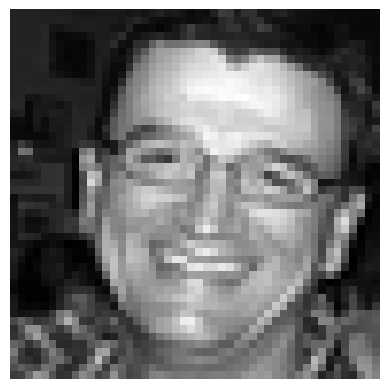

In [2]:
data_dir = Path(PROJECT_ROOT / "data/raw/Data/Happy")

img = Image.open(next(data_dir.glob("*.png")))
plt.imshow(img, cmap="gray")
plt.axis("off")

#Resolución de la imagen
img_array = np.array(img)
img_array.shape #la imagen tiene un solo canal, y su resolución es de 48x48


In [3]:
#Conteo del número de instancias por clase
total = 0

for dir in os.listdir(PROJECT_ROOT / "data/raw/Data"):
    if dir != ".DS_Store":
        path = "data/raw/Data/" + dir
        length = len(os.listdir(PROJECT_ROOT / path))
        total += length
        print(f"{dir}: {length}")


print(f"Total: {total}")

Happy: 17978
Sad: 12154
Fear: 9714
Angry: 9906
Suprise: 8004
Total: 57756


In [4]:
#Eliminamos todas la imagenes que no sean de tamaño 48x48
for dir in os.listdir(PROJECT_ROOT / "data/raw/Data"):
    if dir != ".DS_Store":
        path = "data/raw/Data/" + dir
        for image in os.listdir(PROJECT_ROOT / path):
            absolute_path = PROJECT_ROOT / path / image
            img = Image.open(absolute_path)
            arr = np.array(img)
            if arr.shape != (48, 48):
                absolute_path.unlink()

In [ ]:
#calculamos el promedio de cada emoción
mean_images = []
mean_labels = []

for dir in os.listdir(PROJECT_ROOT / "data/raw/Data"):
    if dir != ".DS_Store":
        emotion_path = PROJECT_ROOT / "data/raw/Data/" / dir
        n_emotion = len(os.listdir(emotion_path))
        aux = []

        for image in os.listdir(emotion_path):
            absolute_path = emotion_path / image
            img = Image.open(absolute_path)
            arr = np.array(img)
            aux.append(arr)

        emotion_tensor = np.stack(aux)

        emotion_mean = np.array([[emotion_tensor[:, i, j].mean() for i in range(48)] for j in range(48)]).T
        emotion_img = Image.fromarray(emotion_mean)
        mean_images.append(emotion_img)
        mean_labels.append(dir.capitalize())

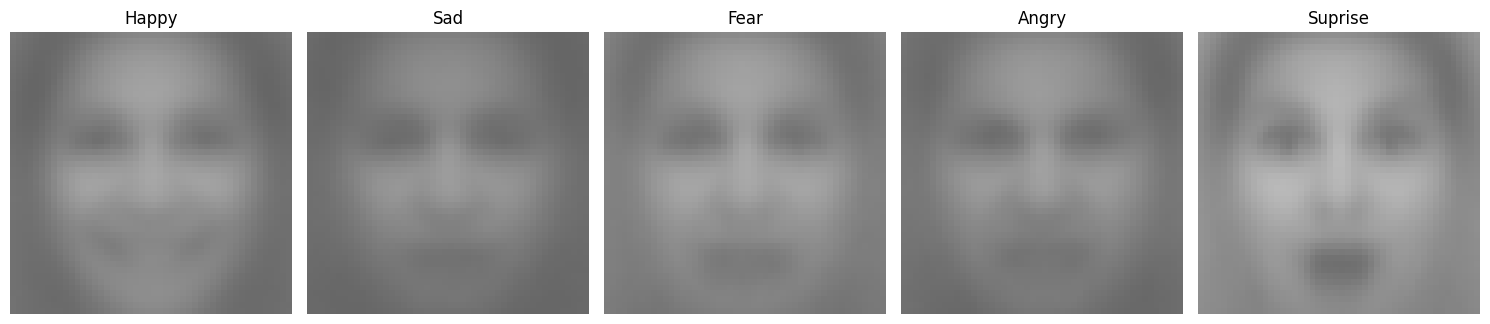

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for ax, label, img in zip(axes, mean_labels, mean_images):
    ax.imshow(img, cmap="gray", vmin=0, vmax=255)
    ax.set_title(label)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [18]:
#Guardamos las imagenes promedio de cada emoción como matrices
mean_images_arr = np.array([np.array(image) for image in mean_images])
mean_images_arr.shape

(5, 48, 48)

In [61]:
resta = np.clip(mean_images_arr[0] - mean_images_arr[3], 0, 255)

In [62]:
resta_img = Image.fromarray(resta)
resta_img_ = resta_img.convert("RGB")
enhancer = ImageEnhance.Contrast(resta_img_)
img_contrast = enhancer.enhance(3.0)

(np.float64(-0.5), np.float64(47.5), np.float64(47.5), np.float64(-0.5))

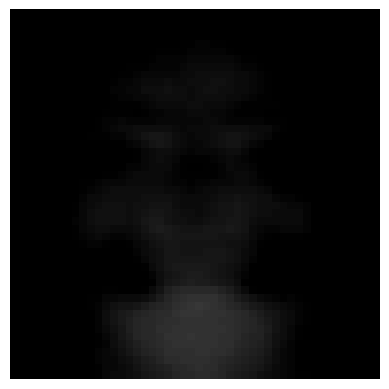

In [63]:
plt.imshow(img_contrast, cmap="gray")
plt.axis("off")